In [56]:
#necessary libraries 

import json
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.linear_model import LogisticRegression
import plotly.figure_factory as ff
import plotly.express as px
import statsmodels.api as sm
from scipy import stats
from scipy.stats import ttest_1samp, ttest_rel, ttest_ind

After getting all the necessary data with Spotify API, framing and labelling ('Spotify API.ipynb' notebook), we can import csv file 

In [2]:
#import dataset created in other jupyter notebook
data = pd.read_csv('my_data.csv')

In [3]:
#check the file: id, title, atist, features, labels (dependent variable)
data

,id,title,main_artist,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Like
0,0TLAptKgYxe7F0KewWH6X6,I Need A Forest Fire,Bon Iver,0.293,0.290,2,-11.596,1,0.69600,0.875000,0.1000,0.0373,128.276,257220,4,1
1,2y0rHDTckWQ7of6tI1yc82,Naked Life,Oko Ebombo,0.624,0.321,0,-9.776,1,0.46300,0.056000,0.1030,0.3040,73.996,255030,4,1
2,5nVE45ithgyVocZp5XLAk6,The Bug Collector,Haley Heynderickx,0.538,0.419,10,-9.705,1,0.77700,0.329000,0.0967,0.5290,99.622,228460,4,1
3,66VuLX5s1nrZzzQqJqPbri,Simply Are,Arto Lindsay,0.682,0.694,7,-11.393,0,0.28900,0.714000,0.0961,0.9540,173.851,224107,4,1
4,0X61Ud5Uzv44RvY3s1SsuO,Imogen,Nick Mulvey,0.493,0.584,5,-6.894,1,0.85000,0.000353,0.1140,0.2340,86.909,255533,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2640,3485UyMhs2ZF50l9sIZEys,FINAIS,benji price,0.750,0.615,11,-7.532,0,0.64200,0.000000,0.2380,0.8330,75.986,207749,4,0
2641,7szuecWAPwGoV1e5vGu8tl,In Your Eyes,The Weeknd,0.667,0.719,7,-5.371,0,0.00285,0.000081,0.0736,0.7170,100.021,237520,4,0
2642,4Ty4XfOHdUFIXmVtBIFMIG,XPIDI,benji price,0.840,0.475,5,-6.665,0,0.64100,0.000000,0.0983,0.8820,77.006,172064,4,0
2643,1xQ6trAsedVPCdbtDAmk0c,Savage Love (Laxed - Siren Beat),Jason Derulo,0.767,0.481,0,-8.520,0,0.23400,0.000000,0.2690,0.7610,150.076,171375,4,0


In [4]:
data =  data.dropna()

In [5]:
data['Like'].unique()

array([1, 0])

In [6]:
data.columns

Index(['id', 'title', 'main_artist', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'Like'],
      dtype='object')

# Exploratory Data Analysis

In [8]:
corr = data.corr()
corr

,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Like
danceability,1.000000,0.061946,0.015964,0.279169,-0.122070,-0.074083,-0.139861,-0.080921,0.523281,-0.069068,-0.389326,0.148894,-0.180271
energy,0.061946,1.000000,0.010012,0.737568,-0.051823,-0.734067,-0.177688,0.180255,0.390503,0.199564,0.023117,0.156644,-0.595087
key,0.015964,0.010012,1.000000,-0.024622,-0.130692,-0.005235,0.022486,-0.012298,0.011707,-0.006733,-0.035241,-0.008967,-0.002194
loudness,0.279169,0.737568,-0.024622,1.000000,-0.073521,-0.545450,-0.374950,0.087657,0.393784,0.137861,-0.104746,0.147266,-0.559730
mode,-0.122070,-0.051823,-0.130692,-0.073521,1.000000,0.062123,-0.011124,0.001894,-0.053145,-0.001177,0.018948,-0.051786,0.055835
acousticness,-0.074083,-0.734067,-0.005235,-0.545450,0.062123,1.000000,0.154173,-0.107107,-0.262900,-0.172790,-0.084558,-0.116266,0.521644
instrumentalness,-0.139861,-0.177688,0.022486,-0.374950,-0.011124,0.154173,1.000000,-0.058651,-0.159240,-0.030166,0.042722,-0.048235,0.319217
liveness,-0.080921,0.180255,-0.012298,0.087657,0.001894,-0.107107,-0.058651,1.000000,0.046418,0.035260,-0.003202,-0.034967,-0.076807
valence,0.523281,0.390503,0.011707,0.393784,-0.053145,-0.262900,-0.159240,0.046418,1.000000,0.111807,-0.295551,0.121521,-0.267826
tempo,-0.069068,0.199564,-0.006733,0.137861,-0.001177,-0.172790,-0.030166,0.035260,0.111807,1.000000,0.031625,0.024544,-0.157499


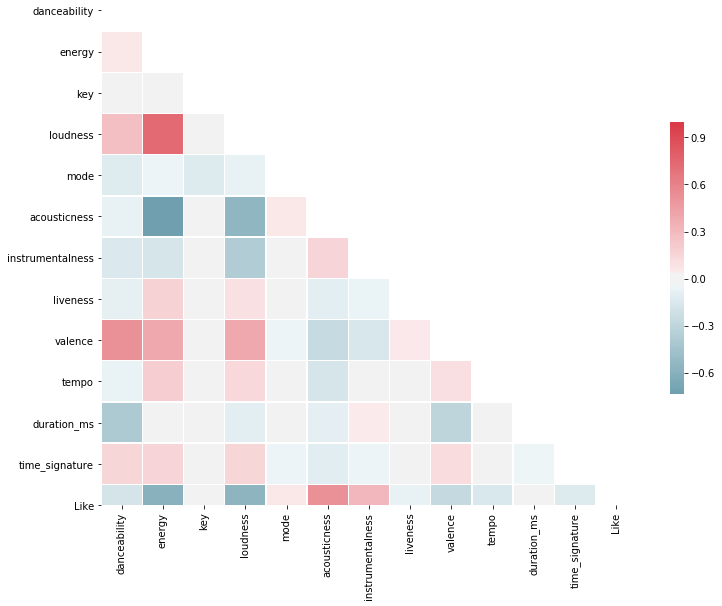

In [9]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

f, ax = plt.subplots(figsize=(12, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Liked vs Disliked Songs

In [58]:
features = ['danceability', 'energy', 'key','loudness', 'mode', 'acousticness', 'instrumentalness', 'liveness','valence', 'tempo', 'duration_ms', 'time_signature']


#scale
from sklearn.preprocessing import MinMaxScaler
# Min-max scaling
df_scaled = pd.DataFrame(MinMaxScaler().fit_transform(data[features]), 
                         columns=data[features].columns)
df_scaled['Like'] = data['Like']

df_radar = df_scaled.groupby('Like').mean().reset_index() \
                    .melt(id_vars='Like', var_name="features", value_name="avg") \
                    .sort_values(by=['Like','features']).reset_index(drop=True)

px.line_polar(df_radar, 
              r="avg", 
              theta="features", 
              title='Mean Values of Each Track Features',
              color="Like", 
              line_close=True,
              line_shape='spline',
              range_r=[0, 0.8],
              color_discrete_sequence=px.colors.cyclical.mygbm[:-6])

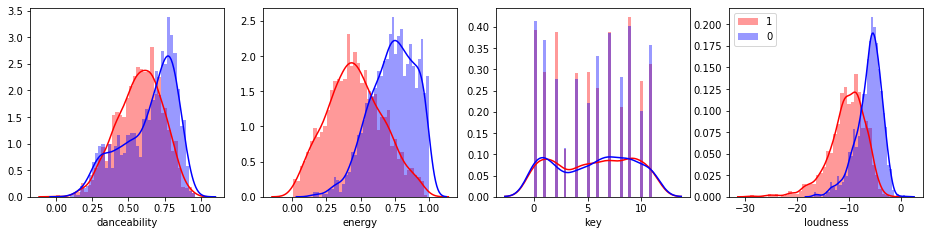

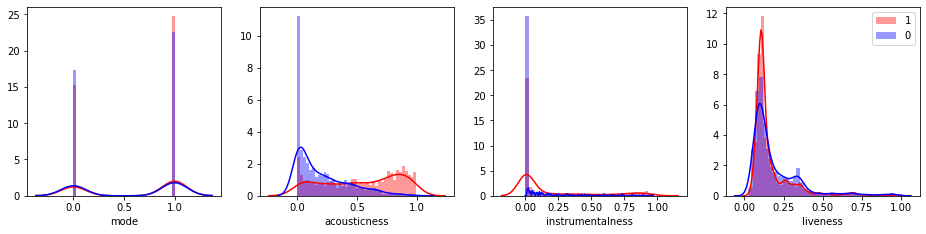

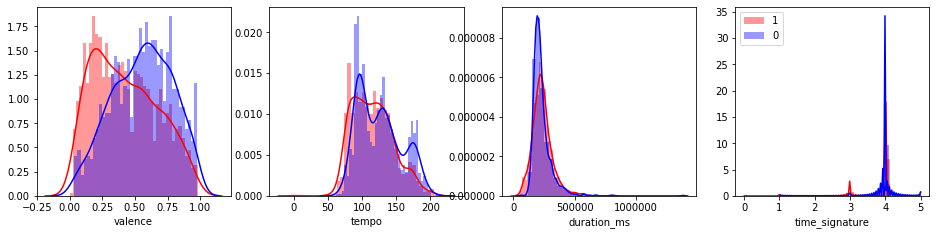

In [7]:
plt.figure(figsize=(16,16))
plt.subplot(4,4,1)
sns.distplot(data[data['Like']==1]['danceability'], color='red', bins=40)
sns.distplot(data[data['Like']==0]['danceability'], color='blue', bins=40)
plt.subplot(4,4,2)
sns.distplot(data[data['Like']==1]['energy'], color='red', bins=40)
sns.distplot(data[data['Like']==0]['energy'], color='blue', bins=40)
plt.subplot(4,4,3)
sns.distplot(data[data['Like']==1]['key'], color='red', bins=40)
sns.distplot(data[data['Like']==0]['key'], color='blue', bins=40)
plt.subplot(4,4,4)
sns.distplot(data[data['Like']==1]['loudness'], color='red', bins=40)
sns.distplot(data[data['Like']==0]['loudness'], color='blue', bins=40)
plt.legend((1,0))

plt.figure(figsize=(16,16))
plt.subplot(4,4,1)
sns.distplot(data[data['Like']==1]['mode'], color='red', bins=40)
sns.distplot(data[data['Like']==0]['mode'], color='blue', bins=40)
plt.subplot(4,4,2)
sns.distplot(data[data['Like']==1]['acousticness'], color='red', bins=40)
sns.distplot(data[data['Like']==0]['acousticness'], color='blue', bins=40)
plt.subplot(4,4,3)
sns.distplot(data[data['Like']==1]['instrumentalness'], color='red', bins=40)
sns.distplot(data[data['Like']==0]['instrumentalness'], color='blue', bins=40)
plt.subplot(4,4,4)
sns.distplot(data[data['Like']==1]['liveness'], color='red', bins=40)
sns.distplot(data[data['Like']==0]['liveness'], color='blue', bins=40)
plt.legend((1,0))


plt.figure(figsize=(16,16))
plt.subplot(4,4,1)
sns.distplot(data[data['Like']==1]['valence'], color='red', bins=40)
sns.distplot(data[data['Like']==0]['valence'], color='blue', bins=40)
plt.subplot(4,4,2)
sns.distplot(data[data['Like']==1]['tempo'], color='red', bins=40)
sns.distplot(data[data['Like']==0]['tempo'], color='blue', bins=40)
plt.subplot(4,4,3)
sns.distplot(data[data['Like']==1]['duration_ms'], color='red', bins=40)
sns.distplot(data[data['Like']==0]['duration_ms'], color='blue', bins=40)
plt.subplot(4,4,4)
sns.distplot(data[data['Like']==1]['time_signature'], color='red', bins=40)
sns.distplot(data[data['Like']==0]['time_signature'], color='blue', bins=40)
plt.legend((1,0))

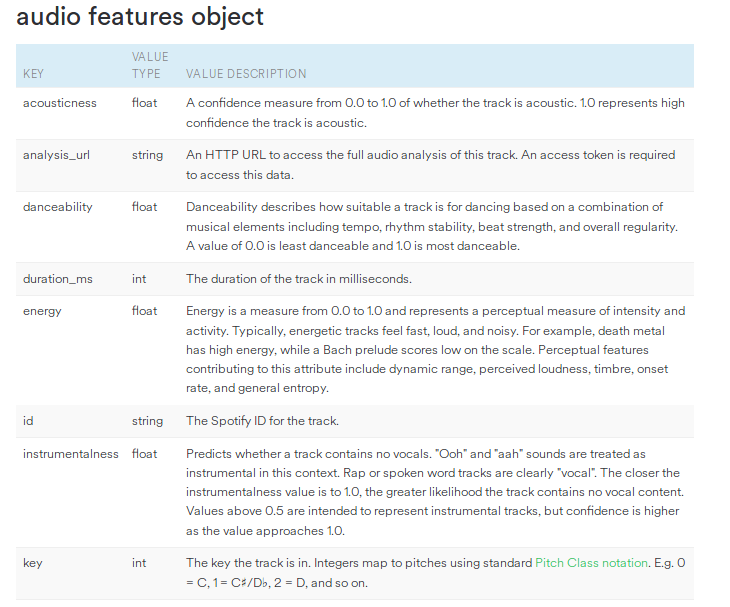

In [10]:
from IPython.display import display, Image, SVG, Math, YouTubeVideo
Image(filename='../images/features.png')

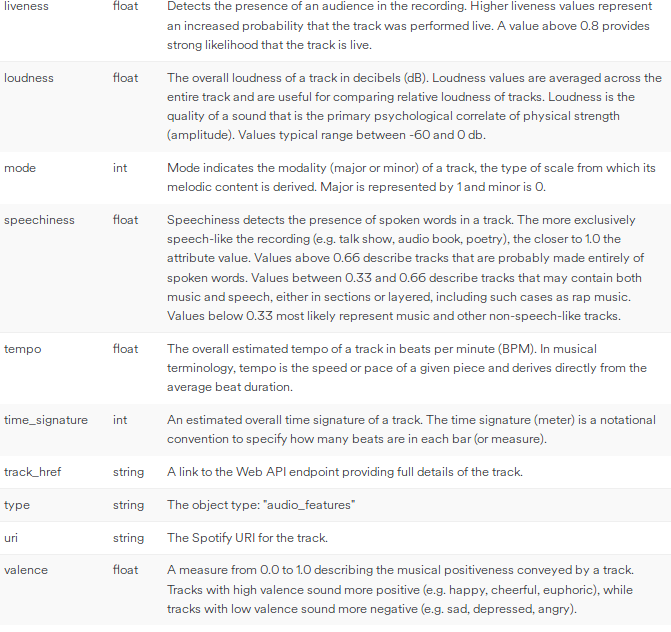

In [11]:
Image(filename='../images/features2.png')

## TEMPO. Simply put, how many beats per minute (BPM) does each song have?

Tempos are also related to different Genres

- Hip Hop	85–95 BPM
- Glitch Hop	105–115 BPM
- Techno	120–125 BPM
- House	& POP 115–130 BPM
- Electro	128 BPM
- Reggaeton >130 BPM
- Dubstep	140 BPM



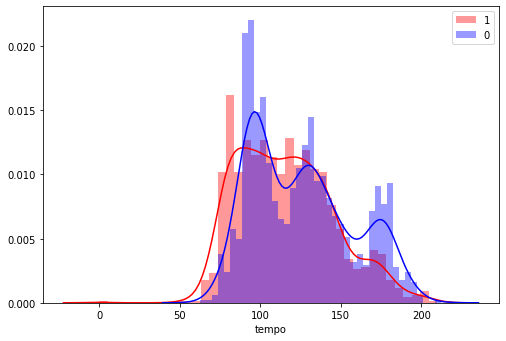

In [12]:
plt.figure(figsize=(18,12))
plt.subplot(2,2,1)
sns.distplot(data[data['Like']==1]['tempo'], color='red', bins=40)
sns.distplot(data[data['Like']==0]['tempo'], color='blue', bins=40)
plt.legend((1,0))

#we see 3 picks for disliked songs:
#one between 90-110 -> prob pop
#125-140 --> sertanejo
#170-290 ---> Anitta, Reggaeton

In [13]:
data[data['Like']==0].sort_values("tempo", ascending = False).head(30)

,id,title,main_artist,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Like
1943,6MNGxu8MprKGkchUchkJsy,Machika,Anitta,0.615,0.833,9,-3.377,1,0.052400,0.000000,0.1710,0.5380,212.117,181733,4,0
2373,4MbJlBkNTEXGJ0sL8U5ABN,Armed To The Teeth,Annihilator,0.362,0.974,1,-4.481,0,0.000044,0.014900,0.2310,0.5210,199.999,266015,4,0
2375,4lRvl2PMPqavdm4Q1qNV0M,New Colossal Hate,Lamb of God,0.383,0.995,2,-3.222,1,0.000011,0.733000,0.3060,0.1490,199.887,270746,3,0
2609,190U8w42yxwiVqY8Tof8Dd,Ela Precisa,David Carreira,0.434,0.653,4,-8.454,0,0.350000,0.000000,0.1150,0.3360,199.879,206053,3,0
1618,4sO6Ixf414qYGlGqMETzMF,Ya Fue,Elias Diaz,0.727,0.893,9,-2.675,0,0.184000,0.000006,0.1020,0.7700,196.005,198367,4,0
1368,6fkfMwMVgFJik4ljNMHGrB,Procura,Juan Miguel,0.628,0.686,7,-7.266,1,0.157000,0.000000,0.3780,0.6670,195.867,221122,4,0
2422,2AjEKcRXkntPkujLXp6hGD,Jinnslammer,Ignea,0.311,0.988,7,-3.397,1,0.000028,0.130000,0.1320,0.2690,195.058,279692,3,0
2157,5t6z9HeNkHWVp0YiXIlSBQ,The Coming Curse,Iced Earth,0.289,0.952,1,-7.740,0,0.000645,0.193000,0.2540,0.0674,195.042,573267,4,0
2119,4GMQOjbWshf4Mzphkjg0DJ,Tornado Of Souls,Megadeth,0.405,0.932,7,-11.151,1,0.002150,0.031700,0.0720,0.4080,194.639,322933,4,0
1937,5UE8e9VTMmv5fjGXLETjCf,Deixa ele sofrer,Anitta,0.682,0.724,8,-4.449,0,0.050800,0.000001,0.0795,0.4220,194.026,171547,4,0


In [14]:
data[data['Like']==1]['tempo'].mean() #Thanks Frank Ocean!! 

115.80208957528971

In [15]:
data[data['Like']==0]['tempo'].mean()

125.51177185185172

## ENERGY. Measure of intensity and activity

- This is the first of Spotify’s more subjective metrics. 

- Energy represents a perceptual measure of intensity and activity. 
- Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale.


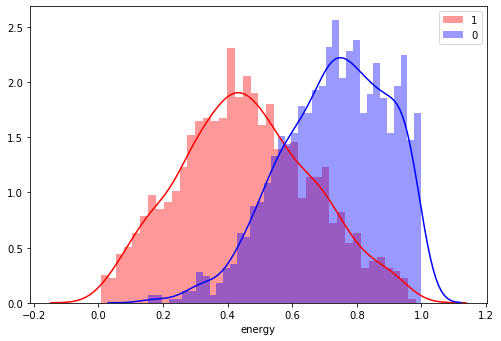

In [16]:
plt.figure(figsize=(18,12))
plt.subplot(2,2,1)
sns.distplot(data[data['Like']==1]['energy'], color='red', bins=40)
sns.distplot(data[data['Like']==0]['energy'], color='blue', bins=40)
plt.legend((1,0))

(array([0, 1]), <a list of 2 Text xticklabel objects>)

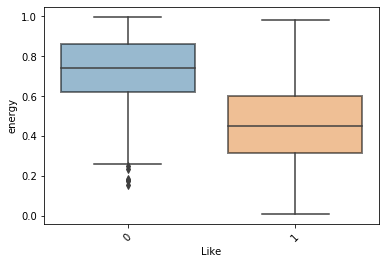

In [17]:
plt.figure(figsize = (6, 4))
ax = sns.boxplot(x='Like', y='energy', data = data)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

In [18]:
print(data[data['Like']==1]['energy'].mean()) 
print(data[data['Like']==0]['energy'].mean())

x = data[data['Like']==1]['energy']
y = data[data['Like']==0]['energy']

print(stats.ttest_ind(x,y)) #totally reject the H0 

#there are significant differences between the two groups on the ENERGY feature

0.45861010038609984
0.7311881481481493
Ttest_indResult(statistic=-38.06768851273597, pvalue=3.338555166700007e-253)


#### What artists are driving this ENERGY score on my liked songs?

In [19]:
lower_energy = data[data['Like']==1].sort_values("energy").head(30)
lower_energy

,id,title,main_artist,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Like
143,769vrJXv69vVKlZjX9XJ4W,Meet You In The Maze,James Blake,0.325,0.00722,10,-26.397,1,0.966,0.000010,0.1100,0.0650,107.448,295274,4,1
68,4QwzVlAJSkcLeCNQ6Ug30P,The touch of your lips,Chet Baker,0.478,0.00776,10,-24.986,1,0.983,0.780000,0.1050,0.2150,114.270,499533,4,1
568,2rewrH6juNsrGRtkMbNKAe,I work for the Universe,Nick Murphy,0.282,0.01030,2,-25.144,1,0.990,0.909000,0.1910,0.0999,115.202,583804,4,1
556,2TfNMJMvnILjmL8fSYlGAy,Blood And,Nick Murphy,0.273,0.01880,9,-28.400,1,0.989,0.963000,0.0944,0.0766,93.292,255135,4,1
875,59J9tAbY39foKp478aUsWX,"Satisfied Mind - Live at WFMU, East Orange, NJ...",Jeff Buckley,0.403,0.02750,9,-17.715,1,0.932,0.000039,0.1110,0.1360,92.380,357627,3,1
565,0u0IIYFZXtmtKTJilgOI3Z,Tongue (Lift 4),Nick Murphy,0.154,0.02750,1,-18.428,1,0.988,0.000140,0.0939,0.0843,176.324,244603,5,1
557,2uEgyXzyJBr5Iuvqc83d4N,And You Don’t Even Know You Hurt Me,Nick Murphy,0.178,0.02900,5,-25.484,1,0.994,0.931000,0.1010,0.0711,71.676,808503,4,1
127,2ChIDG3Ae88OSrocGzjZzT,Lullaby For My Insomniac,James Blake,0.318,0.02970,10,-16.581,1,0.957,0.001170,0.0969,0.0624,129.706,223800,5,1
132,73Uc6U9BTEFoGP5ywB6MLr,f.o.r.e.v.e.r.,James Blake,0.420,0.03750,10,-17.351,0,0.972,0.000057,0.0975,0.1590,128.997,160512,3,1
19,4IhTXiZLKATmwhMZIb1GQN,Lights Are On,Tom Rosenthal,0.440,0.04000,3,-16.887,1,0.981,0.465000,0.1110,0.2490,135.965,193749,4,1


In [20]:
lower_energy['main_artist'].value_counts().head(10)

#Bon Iver
#Frank Ocean
#James Blake
#Nick Murphy fka Chet Faket
#Tim Bernardes, B Fachada 

Bon Iver         4
Nick Murphy      4
James Blake      4
Tim Bernardes    2
B Fachada        1
Expedidor        1
Ben Howard       1
Fleet Foxes      1
Lana Del Rey     1
John Mayer       1
Name: main_artist, dtype: int64

#### Thank's Nick fka Chet Faker

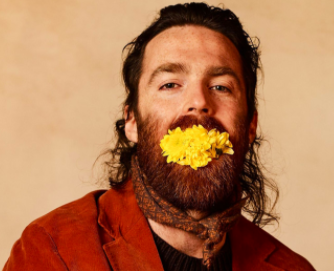

In [21]:
Image(filename='../images/Chet Faker.png')

## DANCEABILITY. 

###### According to the API documentation:
Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity.

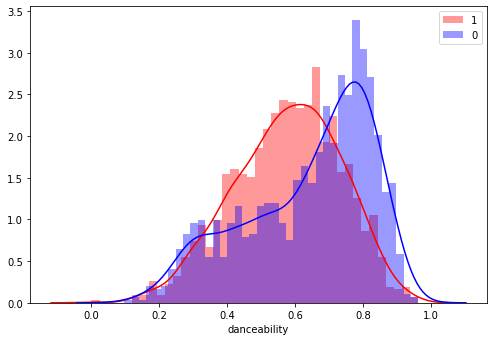

In [22]:
plt.figure(figsize=(18,12))
plt.subplot(2,2,1)
sns.distplot(data[data['Like']==1]['danceability'], color='red', bins=40)
sns.distplot(data[data['Like']==0]['danceability'], color='blue', bins=40)
plt.legend((1,0))

Looks like while my 'disliked' songs follow a skewed distribution torwards higher levels of danceability, my loved songs follow a super normal distribution on this feature showing that I enjoy a wide range of danceability level

#### Songs with lowest danceability 

In [23]:
low_dance = data[data['Like']==1].sort_values(by="danceability").head(50)

In [24]:
low_dance['main_artist'].value_counts().head(10)

Lana Del Rey                          7
Nick Murphy                           4
Ben Howard                            3
Tash Sultana                          3
James Blake                           3
B Fachada                             2
Daniel Caesar                         2
Frank Ocean                           2
Edward Sharpe & The Magnetic Zeros    1
Mallu Magalhães                       1
Name: main_artist, dtype: int64

##### The fault's on this beautiful album..... guess LDR doesn't wanna dance w/ me

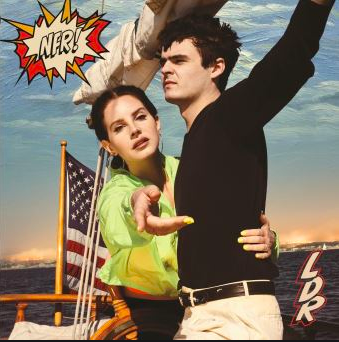

In [25]:
Image(filename='../images/LDR.png')

Spotify doesn’t give any further details as to the exact calculation behind ‘danceability’, but we can find a clue in comparing the two features

### ENERGY vs DANCEABILITY

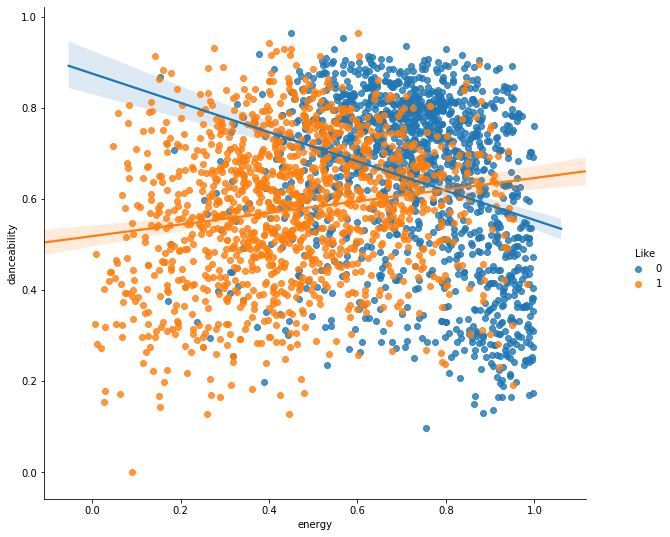

In [26]:
sns.lmplot(x="energy", y="danceability", data=data, hue='Like').fig.set_size_inches(10,8)

#from the graph below we can see that I do enjoy songs with normal level of dancability but low energy
#the imagine shows two very distinct clusters 

#### What is driving a High danceability but low Energy?

In [59]:
high_dance_lower_energy = data[data['Like']==1].sort_values(by="danceability", ascending=False).head(10)
high_dance_lower_energy

#Indie, lo-fi music

,id,title,main_artist,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Like,key_object
1198,6iHgkGwqtr5f4A6qMk0zdC,Tango In Harlem,Touch & Go,0.963,0.602,6,-14.037,1,0.2640,0.382000,0.0885,0.765,131.080,205600,4,1,F♯
1102,0U1Bu9wLRAuNL00uYwubGp,Tranquilo,Thalma Freitas,0.941,0.400,10,-10.977,1,0.7730,0.021500,0.0800,0.878,120.715,259707,4,1,A♯
42,3p5cvrXVxBN2ety8OB4luc,JOAQUIM,S. PEDRO,0.931,0.276,9,-13.045,1,0.4430,0.168000,0.0969,0.473,119.902,183133,3,1,A
1219,0SwAOdc4C2kWUMbsXG4ztz,Most Really Pretty Girls Have Pretty Ugly Feet,HNNY,0.929,0.449,1,-10.425,1,0.0862,0.490000,0.0889,0.612,119.896,285440,4,1,C♯
1167,1g89nNWU8XIjUQwc8BNVTD,Am I a Girl? Am I a Boy? Do I Really Care?,In Love With a Ghost,0.928,0.433,0,-12.604,1,0.5430,0.323000,0.0904,0.757,104.981,59481,4,1,C
1004,0lI4NU85a2bxlPVfzjOuTc,Song For You,Marbert Rocel,0.924,0.415,8,-13.764,1,0.1240,0.171000,0.0905,0.761,123.027,383840,4,1,G♯
1184,1eov6ZGStBvgaHBJvpMCsp,Caprichoso,V.Vizio,0.916,0.404,1,-10.326,1,0.4630,0.000000,0.1100,0.882,127.004,184274,4,1,C♯
1254,5jS8H3e5ehSHgEfAYoxF2s,Choses Qui Se Passent,matt.i,0.915,0.448,6,-7.182,0,0.1720,0.558000,0.1100,0.394,95.009,358679,4,1,F♯
332,1fGf3wl2mFYauz09H7TSQr,The Brazil I Want,O F F,0.914,0.515,1,-11.138,1,0.1990,0.866000,0.1030,0.918,129.884,110769,4,1,C♯
467,4L7jMAP8UcIe309yQmkdcO,Lost,Frank Ocean,0.913,0.603,8,-4.892,1,0.0272,0.000503,0.1670,0.497,123.061,234093,4,1,G♯


## MODE. MAJOR OR MINOR

- Indicates the modality (major or minor) of a track.

- The type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.


In [28]:
data.loc[data['mode']==1, :]['Like'].value_counts()

1    803
0    763
Name: Like, dtype: int64

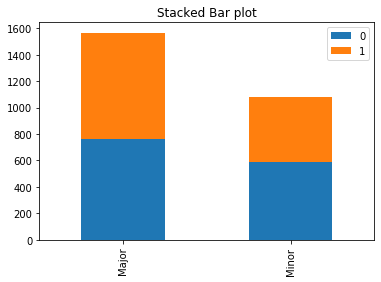

In [29]:
major = data.loc[data['mode']==1, :]['Like'].value_counts()
minor = data.loc[data['mode']==0, :]['Like'].value_counts()

df_plot  = pd.DataFrame([major,minor])
df_plot.index=['Major','Minor']

# Plot
df_plot.plot(kind='bar',stacked=True, title='Stacked Bar plot');

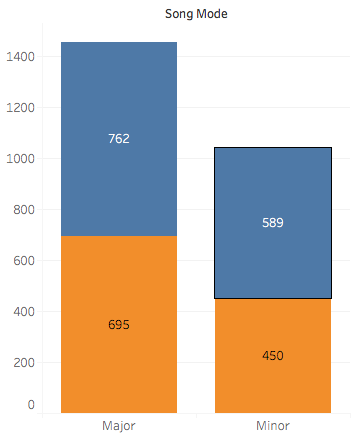

In [30]:
#no shame graph from Tableau
Image(filename='../images/graph_mode.png')

## KEY.

- The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation . 
- E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.

In [31]:
#count how many songs have non detected key

data[data['key'] ==-1]

#all songs have identified key! that's cool

,id,title,main_artist,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Like


##### Note one thing from the key description above: "0 = C, 1 = C♯/D♭, 2 = D" 

In [32]:
data.loc[data['key'] == 0, 'key_object'] = 'C'
data.loc[data['key'] == 1, 'key_object'] = 'C♯'
data.loc[data['key'] == 2, 'key_object'] = 'D'
data.loc[data['key'] == 3, 'key_object'] = 'D♯'
data.loc[data['key'] == 4, 'key_object'] = 'E'#Remember that E and B don't have#
data.loc[data['key'] == 5, 'key_object'] = 'F'
data.loc[data['key'] == 6, 'key_object'] = 'F♯'
data.loc[data['key'] == 7, 'key_object'] = 'G'
data.loc[data['key'] == 8, 'key_object'] = 'G♯'
data.loc[data['key'] == 9, 'key_object'] = 'A'
data.loc[data['key'] == 10, 'key_object'] = 'A♯'
data.loc[data['key'] == 11, 'key_object'] = 'B'

In [33]:
data.head()

,id,title,main_artist,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Like,key_object
0,0TLAptKgYxe7F0KewWH6X6,I Need A Forest Fire,Bon Iver,0.293,0.290,2,-11.596,1,0.696,0.875000,0.1000,0.0373,128.276,257220,4,1,D
1,2y0rHDTckWQ7of6tI1yc82,Naked Life,Oko Ebombo,0.624,0.321,0,-9.776,1,0.463,0.056000,0.1030,0.3040,73.996,255030,4,1,C
2,5nVE45ithgyVocZp5XLAk6,The Bug Collector,Haley Heynderickx,0.538,0.419,10,-9.705,1,0.777,0.329000,0.0967,0.5290,99.622,228460,4,1,A♯
3,66VuLX5s1nrZzzQqJqPbri,Simply Are,Arto Lindsay,0.682,0.694,7,-11.393,0,0.289,0.714000,0.0961,0.9540,173.851,224107,4,1,G
4,0X61Ud5Uzv44RvY3s1SsuO,Imogen,Nick Mulvey,0.493,0.584,5,-6.894,1,0.850,0.000353,0.1140,0.2340,86.909,255533,4,1,F


In [34]:
data['key_object'].unique()

array(['D', 'C', 'A♯', 'G', 'F', 'C♯', 'D♯', 'G♯', 'F♯', 'B', 'A', 'E'],
      dtype=object)

In [35]:
#export to use in tableau dashboard
data.to_csv (r'my_data2.csv', index = False, header=True)

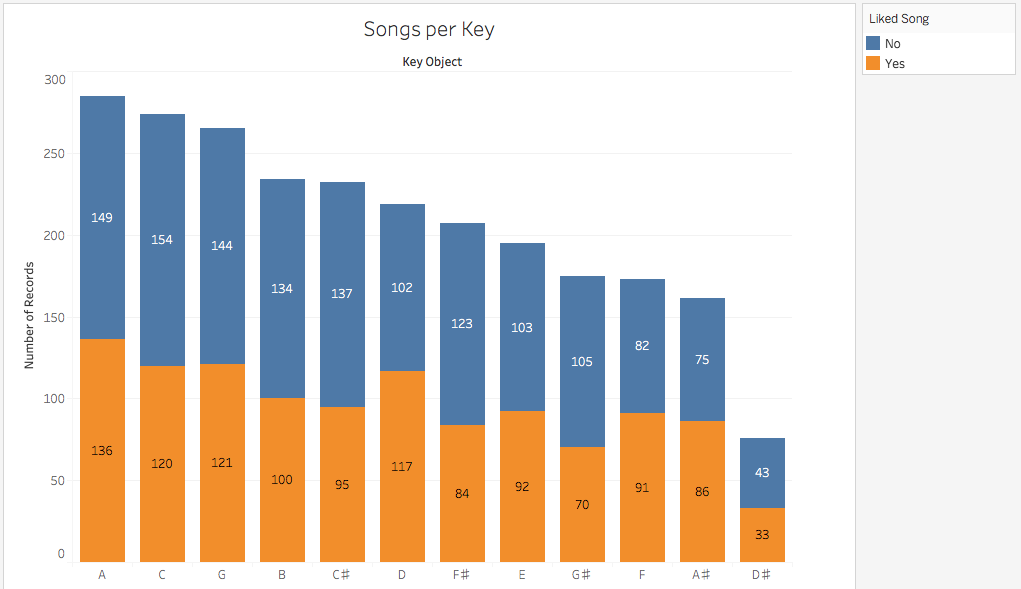

In [36]:
#graph from Tableau
Image(filename='../images/graph_keys.png')

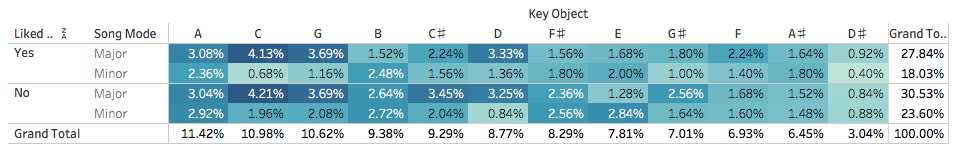

In [37]:
#graph from tableau: with MODE
Image(filename='../images/graph_keys2.png')

- We see that disliked songs have the highest share of Minor key sounds (at 24%). 
- Meanwhile, C major, C# major, and G and D major are especially common keys across both playlists.
- One interesting point is less of F# (major and minor) and E minor in my liked songs vs disliked

## ACOUSTICNESS.

A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 
- 1.0 represents high confidence the track is acoustic. 

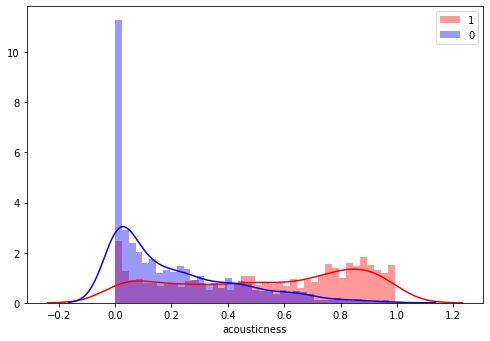

In [38]:
plt.figure(figsize=(18,12))
plt.subplot(2,2,1)
sns.distplot(data[data['Like']==1]['acousticness'], color='red', bins=40)
sns.distplot(data[data['Like']==0]['acousticness'], color='blue', bins=40)
plt.legend((1,0))

#there are a lot of disliked songs with 0 acousticness

## VALENCE.

This is one of the most interesting metrics that Spotify produces: A measure describing the musical positiveness conveyed by a track. 
- Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric)
- tracks with low valence sound more negative (e.g. sad, depressed, angry).

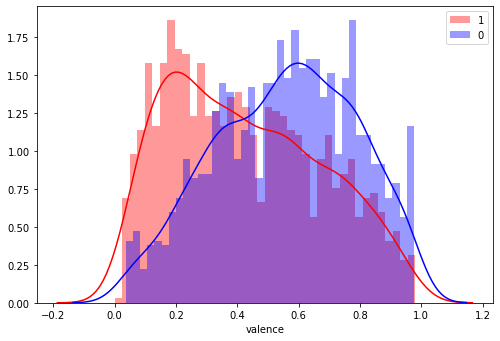

In [39]:
plt.figure(figsize=(18,12))
plt.subplot(2,2,1)
sns.distplot(data[data['Like']==1]['valence'], color='red', bins=40)
sns.distplot(data[data['Like']==0]['valence'], color='blue', bins=40)
plt.legend((1,0))

# This graph is showing that I strongly prefer sad songs rather than happy ones.

#### Let's check what's driving this result

In [40]:
sad = data[data['Like']==1].sort_values(by="valence").head(50)

In [41]:
sad['main_artist'].value_counts().head(10) #I was ecpecting this.... thanks LDR again

Ben Howard      5
Lana Del Rey    5
James Blake     5
Bon Iver        3
alt-J           2
B Fachada       2
Yiuliusly       1
Lykke Li        1
Lorde           1
DRAMA           1
Name: main_artist, dtype: int64

### Valence vs Danceability

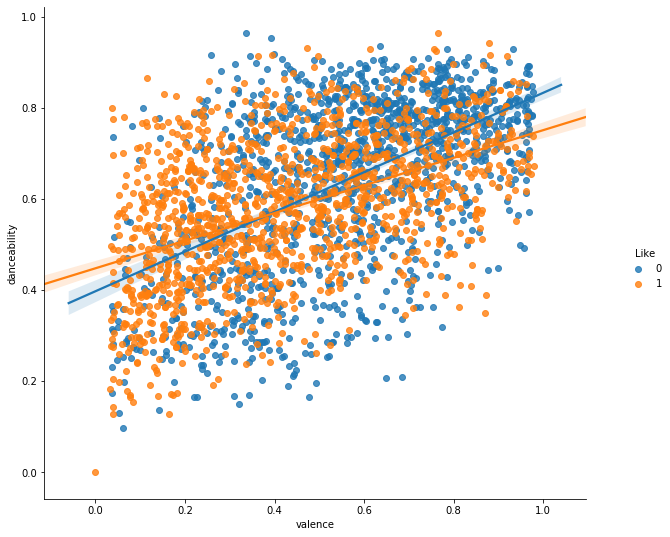

In [42]:
sns.lmplot(x="valence", y="danceability", data=data, hue='Like').fig.set_size_inches(10,8)

#hard to check a cluster from disliked to liked songs 
#but we an see relationship between valence and danceability: the happier the song the better to dance 

## LOUDNESS.The overall loudness of a track in decibels (dB). 

Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.


#### Fyi. Did you know? Spotify adjusts loudness.

When Spotify receives the audio file, they transcode it to delivery formats Ogg/Vorbis and AAC. 
At the same time, they calculate the loudness level and store that information as metadata in the transcoded formats of the track.

https://artists.spotify.com/faq/mastering-and-loudness#how-does-spotify-calculate-loudness

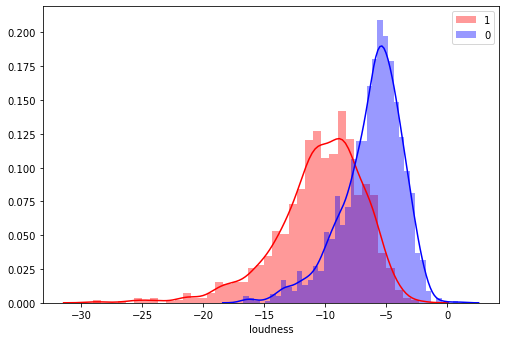

In [44]:
plt.figure(figsize=(18,12))
plt.subplot(2,2,1)
sns.distplot(data[data['Like']==1]['loudness'], color='red', bins=40)
sns.distplot(data[data['Like']==0]['loudness'], color='blue', bins=40)
plt.legend((1,0))

#As I was expecting my liked songs distribution is placed on a lower level of loudness vs disliked songs

## INSTRUMENTALNESS.


- Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. - - Rap or spoken word tracks are clearly “vocal”. 
- The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. 
- Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0. 

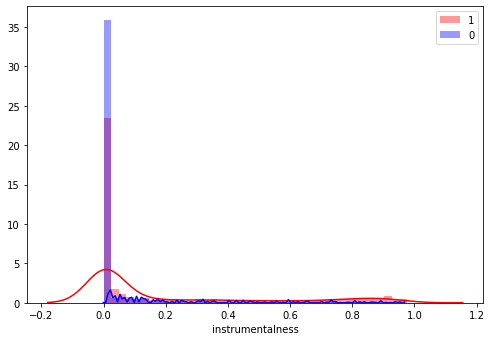

In [45]:
plt.figure(figsize=(18,12))
plt.subplot(2,2,1)
sns.distplot(data[data['Like']==1]['instrumentalness'], color='red', bins=40)
sns.distplot(data[data['Like']==0]['instrumentalness'], color='blue', bins=40)
plt.legend((1,0))

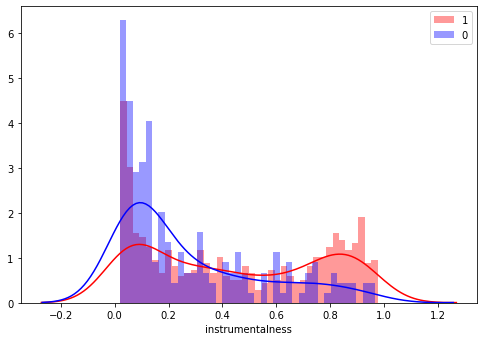

In [46]:
data_test = data[data['instrumentalness']>0.02]

plt.figure(figsize=(18,12))
plt.subplot(2,2,1)
sns.distplot(data_test[data_test['Like']==1]['instrumentalness'], color='red', bins=40)
sns.distplot(data_test[data_test['Like']==0]['instrumentalness'], color='blue', bins=40)
plt.legend((1,0))

(array([0, 1]), <a list of 2 Text xticklabel objects>)

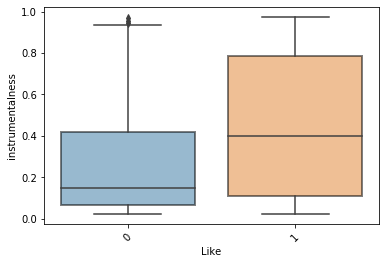

In [47]:
#even using data_test with only songs over 0.02 of instrumentalness level, we can see that my liked songs have 
#a significantly higher level of instruments present in the song, higher likelihood of tracks
#contains no vocal content --> this is also probably due to Lo-Fi songs

plt.figure(figsize = (6, 4))
ax = sns.boxplot(x='Like', y='instrumentalness', data = data_test)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

## LIVENESS. LIVE MUSIC?

- Detects the presence of an audience in the recording. 
- Higher liveness values represent an increased probability that the track was performed live. 
- A value above 0.8 provides strong likelihood that the track is live. 

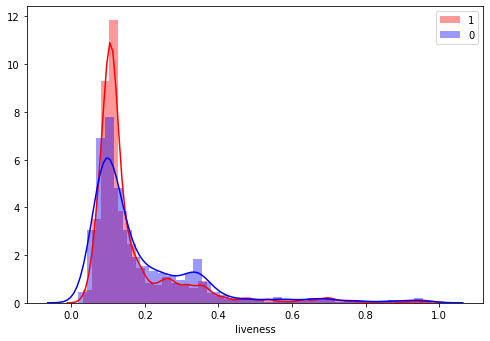

In [48]:
plt.figure(figsize=(18,12))
plt.subplot(2,2,1)
sns.distplot(data[data['Like']==1]['liveness'], color='red', bins=40)
sns.distplot(data[data['Like']==0]['liveness'], color='blue', bins=40)
plt.legend((1,0))

#liked songs more concentrated on not live recorded songs

### One Song: 3 different versions

In [49]:
data[data['title'] == 'Moon River']

,id,title,main_artist,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Like,key_object
475,41cpvQ2GyGb2BRdIRSsTqK,Moon River,Frank Ocean,0.240,0.1160,0,-13.216,1,0.877,0.000920,0.100,0.0937,77.349,188324,3,1,C
630,1IRRqn75jaZHp7zMT1NGbZ,Moon River,Jacob Collier,0.144,0.1540,10,-12.596,1,0.970,0.028400,0.103,0.0400,85.391,496880,4,1,A♯
1292,2KNMqqNd3sLfeN4ukKduRT,Moon River,Frank Sinatra,0.171,0.0632,0,-20.776,1,0.945,0.000027,0.121,0.1680,81.406,199133,3,1,C


- While Frank (Sinatra)'s version holds the lower energy level is also the one with highest danceability, liveness and valence
- Both Ocean and Sinatra produce the song in C as major while Jacob plays in A#. He also plays in a faster tempo
